# Data processing
## Objective:
Handle 'text' type data using several techniques: Label Encoding, One-Hot Encoding, BoW, TF-IDF 

Normalize data using StandardScaler

Compare text representation tools (BoW, TF-IDF) using K-Means Clustering and Calculate the score using Silhouette scores

PCA and Data visualization
## Tools used:
Numpy 

Pandas

Scikit-learn

Matplotlib


In [15]:
#Import libraries
import numpy as np
import pandas as pd

In [16]:
#Read the data
original_data = pd.read_csv('data\data_processed.csv')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Admin\AppData\Local\Temp\ipykernel_6652\1709172110.py:2: SyntaxWarning: invalid escape sequence '\d'
  original_data = pd.read_csv('data\data_processed.csv')


In [17]:
#Copy the data so that we won't change the original file
data = original_data.copy()

In [18]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.0
...,...,...,...,...,...,...,...,...,...
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hon g Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.0
85,MacLehose Trail overall,Long-distance Trail,100.000000,2.385429,Hard,New Territories,"beaches, mountains",4.300000,16571.0
86,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.0
87,Lantau Trail overall,Long-distance Trail,70.000000,2.385429,Moderate,Lantau,"mountain peaks, traditional villages, coastal ...",4.400000,10036.0


We start by handling the 'text' column

In [19]:
#Print out names of types of Trails in Hong Kong
print(data['type'].unique())

['Long-distance Trail' 'Hong Kong Trail' 'Lantau Trail' 'Wilson Trail'
 'Country Trail' 'Nature Trail' 'Tree Walk' 'Family Walk' 'Geo Route'
 'Recommended Route' 'Hon g Kong Trail']


In [20]:
#Count the number of each type
data['type'].value_counts()

type
Country Trail          21
Long-distance Trail    14
Recommended Route      10
Hong Kong Trail         8
Nature Trail            7
Wilson Trail            7
Lantau Trail            6
Tree Walk               6
Family Walk             5
Geo Route               4
Hon g Kong Trail        1
Name: count, dtype: int64

We find that there is one name called 'Hon g Kong Trail', seems like it is a typo here, so we may change the name to 'Hong Kong Trail'

In [21]:
data['type'] = data['type'].replace('Hon g Kong Trail','Hong Kong Trail' )

In [22]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.0
...,...,...,...,...,...,...,...,...,...
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hong Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.0
85,MacLehose Trail overall,Long-distance Trail,100.000000,2.385429,Hard,New Territories,"beaches, mountains",4.300000,16571.0
86,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.0
87,Lantau Trail overall,Long-distance Trail,70.000000,2.385429,Moderate,Lantau,"mountain peaks, traditional villages, coastal ...",4.400000,10036.0


In [23]:
type = data[['type']] #Create a dataframe using 'type' column

In [24]:
type

,type
0,Long-distance Trail
1,Long-distance Trail
2,Long-distance Trail
3,Long-distance Trail
4,Long-distance Trail
...,...
84,Hong Kong Trail
85,Long-distance Trail
86,Long-distance Trail
87,Long-distance Trail


In [25]:
#Use One hot encoder for 'type'. Because the data is unordered, so using one-hot encoding makes distances between 
from sklearn.preprocessing import OneHotEncoder
encoder_1hot_type = OneHotEncoder(sparse_output=False) # If the output is a sparse matrix, then we will not able to make the dataframe later
type_1hot = encoder_1hot_type.fit_transform(type)
type_1hot
# Change to one-hot type

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [26]:
encoder_1hot_type.categories_[0]

array(['Country Trail', 'Family Walk', 'Geo Route', 'Hong Kong Trail',
       'Lantau Trail', 'Long-distance Trail', 'Nature Trail',
       'Recommended Route', 'Tree Walk', 'Wilson Trail'], dtype=object)

In [27]:
df_type_1hot = pd.DataFrame(type_1hot, columns=encoder_1hot_type.get_feature_names_out(['type'])) #Create the dataframe using the encoded data

In [28]:
df_type_1hot

,type_Country Trail,type_Family Walk,type_Geo Route,type_Hong Kong Trail,type_Lantau Trail,type_Long-distance Trail,type_Nature Trail,type_Recommended Route,type_Tree Walk,type_Wilson Trail
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
84,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [29]:
data = pd.concat([data, df_type_1hot], axis=1) # Concatenate vertically

In [30]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain,type_Country Trail,type_Family Walk,type_Geo Route,type_Hong Kong Trail,type_Lantau Trail,type_Long-distance Trail,type_Nature Trail,type_Recommended Route,type_Tree Walk,type_Wilson Trail
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hong Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
85,MacLehose Trail overall,Long-distance Trail,100.000000,2.385429,Hard,New Territories,"beaches, mountains",4.300000,16571.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
86,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
87,Lantau Trail overall,Long-distance Trail,70.000000,2.385429,Moderate,Lantau,"mountain peaks, traditional villages, coastal ...",4.400000,10036.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Next we handle the 'difficulty' column

In [31]:
print(data['difficulty'].unique()) #Print all values

['Hard' 'Moderate' 'Easy']


In [32]:
data['difficulty'].value_counts()

difficulty
Hard        44
Easy        23
Moderate    22
Name: count, dtype: int64

In [33]:
data[['difficulty']]

,difficulty
0,Hard
1,Hard
2,Hard
3,Hard
4,Hard
...,...
84,Moderate
85,Hard
86,Moderate
87,Moderate


In [34]:
#Use ordinal binarizer for difficulty -> correlation between categories
from sklearn.preprocessing import OrdinalEncoder
categories = [['Easy', 'Moderate', 'Hard']] 
encoder_ordinal = OrdinalEncoder(categories=categories)
difficulty = data[['difficulty']] # Make the 'difficulty' column a dataframe because OrdinalEncoder needs a dataframe
difficulty_encoded = encoder_ordinal.fit_transform(difficulty)
difficulty_encoded



array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],

In [35]:
data['difficulty_encoded'] = difficulty_encoded # Add the encoded column to our dataframe

In [36]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain,type_Country Trail,type_Family Walk,type_Geo Route,type_Hong Kong Trail,type_Lantau Trail,type_Long-distance Trail,type_Nature Trail,type_Recommended Route,type_Tree Walk,type_Wilson Trail,difficulty_encoded
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hong Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
85,MacLehose Trail overall,Long-distance Trail,100.000000,2.385429,Hard,New Territories,"beaches, mountains",4.300000,16571.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
86,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
87,Lantau Trail overall,Long-distance Trail,70.000000,2.385429,Moderate,Lantau,"mountain peaks, traditional villages, coastal ...",4.400000,10036.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Handle the 'region' column

In [37]:
print(data['region'].unique())

['Sai Kung' 'Central New Territories' 'West New Territories'
 'Hong Kong Island' 'Lantau' 'North New Territories' 'New Territories'
 'Hong Kong Island / New Territories']


In [38]:
data['region'].value_counts()


region
Sai Kung                              19
Hong Kong Island                      18
Central New Territories               15
Lantau                                15
West New Territories                  12
North New Territories                  8
New Territories                        1
Hong Kong Island / New Territories     1
Name: count, dtype: int64

We find that there are two trails whose region appear only one time: New Territories and Hong Kong Island/ New Terriories. So we can try to delete them.

In [39]:
data = data[data['region'] != 'New Territories']
data = data[data['region'] != 'Hong Kong Island / New Territories']

In [40]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain,type_Country Trail,type_Family Walk,type_Geo Route,type_Hong Kong Trail,type_Lantau Trail,type_Long-distance Trail,type_Nature Trail,type_Recommended Route,type_Tree Walk,type_Wilson Trail,difficulty_encoded
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Shui Long Wo to Tai Shui Tseng,Recommended Route,9.242632,2.385429,Hard,Sai Kung,"Pyramid Hill, Ma On Shan, The Hunch Backs",4.700000,1729.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
83,Tai Tong to Wong Nai Tun Reservoir,Recommended Route,7.100000,3.500000,Hard,West New Territories,"Sweet Gum Woods, Thousand-Island Lake",4.270769,1623.465187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hong Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
86,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


After deleting those rows, the indexes are messy so we should reset them to correct order

In [41]:
data = data.reset_index(drop=True) # Reset the indexes


In [42]:
data['region'].value_counts() # Count the values again

region
Sai Kung                   19
Hong Kong Island           18
Central New Territories    15
Lantau                     15
West New Territories       12
North New Territories       8
Name: count, dtype: int64

In [43]:
data['region']

0                    Sai Kung
1                    Sai Kung
2                    Sai Kung
3                    Sai Kung
4     Central New Territories
               ...           
82                   Sai Kung
83       West New Territories
84           Hong Kong Island
85           Hong Kong Island
86                     Lantau
Name: region, Length: 87, dtype: object

In [44]:
data.isna().sum() # Check if any column has null values

name                        0
type                        0
length_km                   0
duration_hour               0
difficulty                  0
region                      0
type_of_view                0
rating                      0
elevation_gain              0
type_Country Trail          0
type_Family Walk            0
type_Geo Route              0
type_Hong Kong Trail        0
type_Lantau Trail           0
type_Long-distance Trail    0
type_Nature Trail           0
type_Recommended Route      0
type_Tree Walk              0
type_Wilson Trail           0
difficulty_encoded          0
dtype: int64

In [45]:
encoder_1hot_region = OneHotEncoder(sparse_output=False)
region = data[['region']] # Make the dataframe
region_1hot = encoder_1hot_region.fit_transform(region)
region_1hot.shape


(87, 6)

In [46]:
encoder_1hot_region.categories_

[array(['Central New Territories', 'Hong Kong Island', 'Lantau',
        'North New Territories', 'Sai Kung', 'West New Territories'],
       dtype=object)]

In [47]:
data.shape #Check the data shape before merging the regions

(87, 20)

In [48]:
df_region_1hot = pd.DataFrame(region_1hot, columns=encoder_1hot_region.get_feature_names_out(['region']))
data = pd.concat([data, df_region_1hot], axis=1) # Concatenate vertically
df_region_1hot

,region_Central New Territories,region_Hong Kong Island,region_Lantau,region_North New Territories,region_Sai Kung,region_West New Territories
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
82,0.0,0.0,0.0,0.0,1.0,0.0
83,0.0,0.0,0.0,0.0,0.0,1.0
84,0.0,1.0,0.0,0.0,0.0,0.0
85,0.0,1.0,0.0,0.0,0.0,0.0


In [49]:
df_region_1hot.shape

(87, 6)

In [50]:
data.shape # The shape of data now is (87,26)

(87, 26)

The data is very different so we need to normalize it before testing with different algorithms or techniques

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data.select_dtypes(np.number)) # Normalize the columns which data types are number
data_normalized

array([[ 0.35359638,  0.48765566,  0.82273303, ..., -0.31822291,
         1.89181061, -0.4       ],
       [ 0.67495987,  2.07463363,  1.53950323, ..., -0.31822291,
         1.89181061, -0.4       ],
       [ 0.30927038,  1.28114464,  0.82273303, ..., -0.31822291,
         1.89181061, -0.4       ],
       ...,
       [ 0.2031796 ,  0.        ,  0.46434794, ..., -0.31822291,
        -0.52859414, -0.4       ],
       [ 4.71970727,  0.        ,  1.18111813, ..., -0.31822291,
        -0.52859414, -0.4       ],
       [ 6.93600722,  0.        ,  0.46434794, ..., -0.31822291,
        -0.52859414, -0.4       ]], shape=(87, 21))

In [52]:
data.isna().sum() #Check that every column does not have any NaN values

name                              0
type                              0
length_km                         0
duration_hour                     0
difficulty                        0
region                            0
type_of_view                      0
rating                            0
elevation_gain                    0
type_Country Trail                0
type_Family Walk                  0
type_Geo Route                    0
type_Hong Kong Trail              0
type_Lantau Trail                 0
type_Long-distance Trail          0
type_Nature Trail                 0
type_Recommended Route            0
type_Tree Walk                    0
type_Wilson Trail                 0
difficulty_encoded                0
region_Central New Territories    0
region_Hong Kong Island           0
region_Lantau                     0
region_North New Territories      0
region_Sai Kung                   0
region_West New Territories       0
dtype: int64

# Try to handle type_of_view with 3 different techniques: TF-IDF, BoW, Word Embedding and test with K-means to see which method is the best

## BoW

In [53]:
data

,name,type,length_km,duration_hour,difficulty,region,type_of_view,rating,elevation_gain,type_Country Trail,...,type_Recommended Route,type_Tree Walk,type_Wilson Trail,difficulty_encoded,region_Central New Territories,region_Hong Kong Island,region_Lantau,region_North New Territories,region_Sai Kung,region_West New Territories
0,MacLehose Trail (Section 1) Pak Tam Chung to L...,Long-distance Trail,10.600000,3.000000,Hard,Sai Kung,"beach, lake",4.500000,1250.000000,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
1,MacLehose Trail (Section 2) Long Ke to Pak Tam Au,Long-distance Trail,13.500000,5.000000,Hard,Sai Kung,"beauty of the coast of Hong Kong, Sai Wan beac...",4.700000,2168.000000,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
2,MacLehose Trail (Section 3) Pak Tam Au to Kei ...,Long-distance Trail,10.200000,4.000000,Hard,Sai Kung,"forests, views",4.500000,1994.000000,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
3,MacLehose Trail (Section 4) Kei Ling Ha to Tat...,Long-distance Trail,12.700000,5.000000,Hard,Sai Kung,"views, wildflowers",4.500000,2805.000000,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
4,MacLehose Trail (Section 5) Tate's Cairn to Ta...,Long-distance Trail,10.600000,4.500000,Hard,Central New Territories,forests and views,4.500000,1791.000000,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Shui Long Wo to Tai Shui Tseng,Recommended Route,9.242632,2.385429,Hard,Sai Kung,"Pyramid Hill, Ma On Shan, The Hunch Backs",4.700000,1729.000000,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
83,Tai Tong to Wong Nai Tun Reservoir,Recommended Route,7.100000,3.500000,Hard,West New Territories,"Sweet Gum Woods, Thousand-Island Lake",4.270769,1623.465187,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
84,Hong Kong Trail (Section 6) Mount Parker Road ...,Hong Kong Trail,9.242632,2.385429,Moderate,Hong Kong Island,Tai Tam Reservoir,4.400000,180.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
85,Hong Kong Trail overall,Long-distance Trail,50.000000,2.385429,Moderate,Hong Kong Island,Views and tourist attractions,4.600000,5524.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
# Transform words to a matrix of vocabularies
v = CountVectorizer()
type_of_view_cv = v.fit_transform(data['type_of_view'].values)
type_of_view_cv
# There are 361 unique words in type_of_view

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 675 stored elements and shape (87, 361)>

In [55]:
type_of_view_cv.toarray()
# We can play with it to see what is the actual matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(87, 361))

In [56]:
type_of_view_cv_np = type_of_view_cv.toarray()
type_of_view_cv_np[0]
# See what is the matrix for the first type_of_view (of the first trail)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
type_of_view_cv.shape

(87, 361)

In [58]:
v.get_feature_names_out()
# Print out words in vocabularies

array(['360', 'aberdeen', 'acacia', 'admire', 'aguilar', 'ancient', 'and',
       'area', 'areas', 'as', 'attractions', 'awe', 'azalea', 'azure',
       'backdrop', 'backs', 'basalt', 'bay', 'bays', 'beach', 'beaches',
       'beacon', 'beauty', 'bell', 'beneath', 'big', 'biodiversity',
       'birds', 'blockhouse', 'blooming', 'box', 'bridge', 'bridges',
       'brisbane', 'buddha', 'by', 'cairn', 'camp', 'can', 'caves',
       'cereus', 'chau', 'chek', 'cherry', 'cheung', 'china', 'chinese',
       'chirping', 'chung', 'city', 'cityscape', 'clear', 'clearwater',
       'coast', 'coastal', 'coastline', 'cochin', 'colours', 'columns',
       'coming', 'country', 'countryside', 'cove', 'craggy', 'creating',
       'crystal', 'cultivation', 'cultural', 'dam', 'davis', 'deck',
       'decomposing', 'defence', 'degree', 'deserted', 'dichrocephala',
       'direction', 'diverse', 'east', 'eight', 'enveloped', 'eroded',
       'escape', 'estuary', 'fathoms', 'fei', 'fields', 'fish', 'flora',

In [59]:
v.vocabulary_
# Print words in vocabulary and there indexes

{'beach': 19,
 'lake': 143,
 'beauty': 22,
 'of': 196,
 'the': 299,
 'coast': 53,
 'hong': 125,
 'kong': 140,
 'sai': 241,
 'wan': 339,
 'azure': 13,
 'sky': 265,
 'and': 6,
 'crystal': 65,
 'clear': 51,
 'seawater': 247,
 'stargazing': 275,
 'area': 7,
 'tai': 288,
 'long': 157,
 'ham': 109,
 'tin': 303,
 'chek': 42,
 'keng': 139,
 'pier': 209,
 'shingle': 258,
 'beaches': 20,
 'mangroves': 166,
 'forests': 92,
 'views': 332,
 'wildflowers': 348,
 'lakes': 144,
 'lead': 149,
 'mine': 170,
 'pass': 201,
 'grassy': 103,
 'hill': 117,
 'needle': 186,
 'shing': 257,
 'mun': 178,
 'reservoir': 227,
 'historical': 120,
 'caves': 39,
 'mo': 172,
 'shan': 252,
 'tea': 295,
 'cultivation': 66,
 'fields': 86,
 'new': 189,
 'territories': 298,
 'tsing': 317,
 'ma': 162,
 'bridge': 31,
 'shenzhen': 255,
 'mist': 171,
 'enveloped': 80,
 'scenery': 243,
 'observation': 194,
 'deck': 70,
 'overlooking': 198,
 'tsuen': 318,
 'stonecutters': 280,
 'ho': 122,
 'pui': 219,
 'irrigation': 133,
 'native':

In [60]:
from scipy.sparse import csr_matrix
data_normalized_sparse = csr_matrix(data_normalized)
# Transform the data_normalized to a sparse matrix ( to make it suitable for merging with hstack later)

In [61]:
from scipy.sparse import hstack
data_bow = hstack([type_of_view_cv, data_normalized_sparse])
# merge the encoded type_of_view with sparse data using hstack

In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9, random_state=42).fit(data_bow)
 # Test with an example of number of clusters, set the random_state so that the result is the same for every number of clusters everytime we run the algorithm
 # Fit the column with data type is number
labels = kmeans.labels_ # Set labels


In [63]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_bow, labels)
# Measures how similar a data point is to its own cluster compared to other clusters. The higher this score is, the better the algorithm is
silhouette_avg

0.13671358914817466

In [64]:
k_values = range(2, 20)  # Calculate Sihouette scores from 2 to 20
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_bow)
    score = silhouette_score(data_bow, kmeans.labels_)
    silhouette_scores.append(score)
silhouette_scores

[0.10465405897532187,
 0.07162650150702886,
 0.07115846781388657,
 0.07561503609559694,
 0.08842521982249563,
 0.1126998435935446,
 0.12933088243869606,
 0.13671358914817466,
 0.12681156137098773,
 0.14276902024175928,
 0.17531524212030797,
 0.17524536331294036,
 0.18620748808354526,
 0.20748302291405937,
 0.21652130193542504,
 0.22681544449292101,
 0.21472333141994152,
 0.2141369962171162]

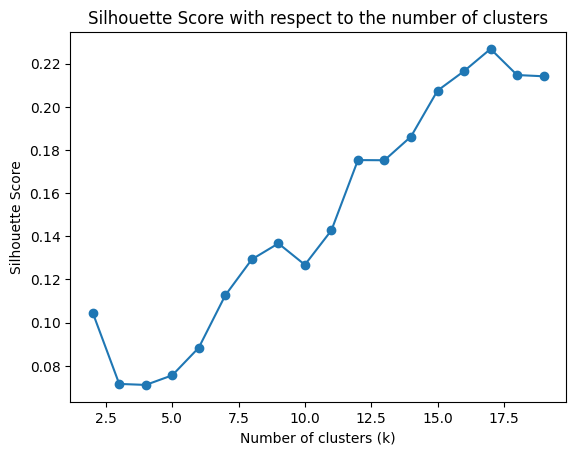

In [65]:
import matplotlib.pyplot as plt
#Draw the graph of Silhouette score with several values of k
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score with respect to the number of clusters')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6652\2124840872.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


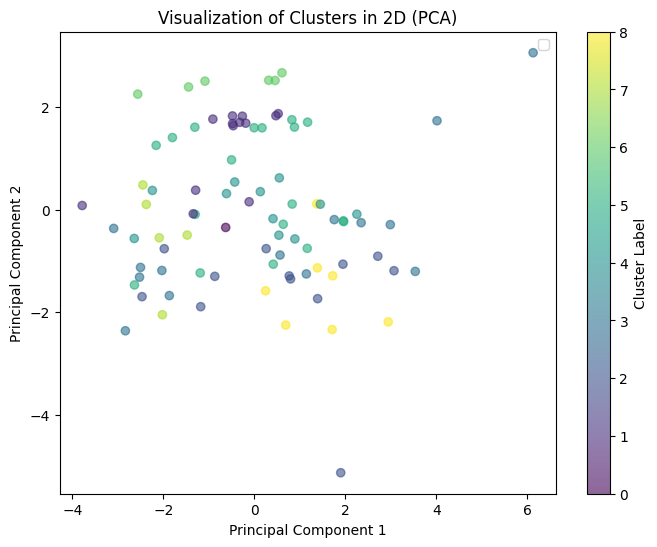

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_bow)

# Draw scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)


# Add title and labels
plt.title('Visualization of Clusters in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(scatter, label='Cluster Label')
plt.show()

## TF-IDF

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer # Import the library for TF-IDF
data['type_of_view']

0                                           beach, lake
1     beauty of the coast of Hong Kong, Sai Wan beac...
2                                        forests, views
3                                    views, wildflowers
4                                     forests and views
                            ...                        
82            Pyramid Hill, Ma On Shan, The Hunch Backs
83                Sweet Gum Woods, Thousand-Island Lake
84                                    Tai Tam Reservoir
85                        Views and tourist attractions
86    mountain peaks, traditional villages, coastal ...
Name: type_of_view, Length: 87, dtype: object

In [68]:
tf = TfidfVectorizer()
type_of_view_tf = tf.fit_transform(data['type_of_view']) #fit the data

In [69]:
type_of_view_tf # See the shape of vocabulary matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 675 stored elements and shape (87, 361)>

In [70]:
tf.vocabulary_ #Print words in vocabulary and their indexes

{'beach': 19,
 'lake': 143,
 'beauty': 22,
 'of': 196,
 'the': 299,
 'coast': 53,
 'hong': 125,
 'kong': 140,
 'sai': 241,
 'wan': 339,
 'azure': 13,
 'sky': 265,
 'and': 6,
 'crystal': 65,
 'clear': 51,
 'seawater': 247,
 'stargazing': 275,
 'area': 7,
 'tai': 288,
 'long': 157,
 'ham': 109,
 'tin': 303,
 'chek': 42,
 'keng': 139,
 'pier': 209,
 'shingle': 258,
 'beaches': 20,
 'mangroves': 166,
 'forests': 92,
 'views': 332,
 'wildflowers': 348,
 'lakes': 144,
 'lead': 149,
 'mine': 170,
 'pass': 201,
 'grassy': 103,
 'hill': 117,
 'needle': 186,
 'shing': 257,
 'mun': 178,
 'reservoir': 227,
 'historical': 120,
 'caves': 39,
 'mo': 172,
 'shan': 252,
 'tea': 295,
 'cultivation': 66,
 'fields': 86,
 'new': 189,
 'territories': 298,
 'tsing': 317,
 'ma': 162,
 'bridge': 31,
 'shenzhen': 255,
 'mist': 171,
 'enveloped': 80,
 'scenery': 243,
 'observation': 194,
 'deck': 70,
 'overlooking': 198,
 'tsuen': 318,
 'stonecutters': 280,
 'ho': 122,
 'pui': 219,
 'irrigation': 133,
 'native':

In [71]:
all_features_name = tf.get_feature_names_out()
for word in all_features_name:
    indx = v.vocabulary_.get(word)
    print(f"{word} {tf.idf_[indx]}") # Print the idf score (Weighting) of all words

360 4.7841896339182615
aberdeen 4.7841896339182615
acacia 4.7841896339182615
admire 4.7841896339182615
aguilar 4.7841896339182615
ancient 4.378724525810097
and 2.386294361119891
area 4.7841896339182615
areas 4.7841896339182615
as 4.7841896339182615
attractions 4.7841896339182615
awe 4.7841896339182615
azalea 4.7841896339182615
azure 4.378724525810097
backdrop 4.7841896339182615
backs 4.7841896339182615
basalt 4.7841896339182615
bay 3.6855773452501515
bays 4.7841896339182615
beach 3.531426665422893
beaches 3.2801122371419873
beacon 4.7841896339182615
beauty 4.378724525810097
bell 4.7841896339182615
beneath 4.7841896339182615
big 4.7841896339182615
biodiversity 4.7841896339182615
birds 4.7841896339182615
blockhouse 4.7841896339182615
blooming 4.378724525810097
box 4.7841896339182615
bridge 3.8678989020441064
bridges 4.7841896339182615
brisbane 4.7841896339182615
buddha 4.7841896339182615
by 4.7841896339182615
cairn 4.7841896339182615
camp 4.7841896339182615
can 4.7841896339182615
caves 4

In [72]:
type_of_view_tf.toarray()[:1] # tf-idf score of 'beach' is 0.653

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.65343476,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [73]:
from scipy.sparse import hstack
data_tf = hstack([type_of_view_tf, data_normalized_sparse])

In [74]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42).fit(data_tf)
 # Test with an example of number of clusters, set the random_state so that the result is the same for every number of clusters everytime we run the algorithm
 # Fit the column with data type is number
tf_labels = kmeans.labels_ # Set labels


In [75]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_tf, labels)
# Measures how similar a data point is to its own cluster compared to other clusters. The higher this score is, the better our algorithm is.
silhouette_avg

0.12091812587591806

In [76]:
k_values = range(2, 20)  # Calculate Sihouette scores from 2 to 20
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_tf)
    score = silhouette_score(data_tf, kmeans.labels_)
    silhouette_scores.append(score)
silhouette_scores

[0.09968484501742944,
 0.07838924911256089,
 0.11384775336100657,
 0.13356147112488345,
 0.1764308068621519,
 0.21003889044618673,
 0.2518503038901257,
 0.2795462168638649,
 0.29302623126545974,
 0.27788552763315943,
 0.28845366768160263,
 0.31054788522386906,
 0.31847719954528725,
 0.34070366231420357,
 0.34722498515017947,
 0.3431391470293841,
 0.3393602089204704,
 0.3530051627250632]

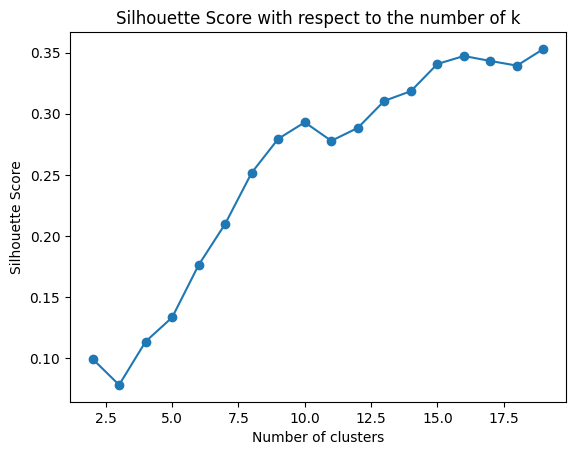

In [77]:
import matplotlib.pyplot as plt

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score with respect to the number of k')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6652\433080324.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


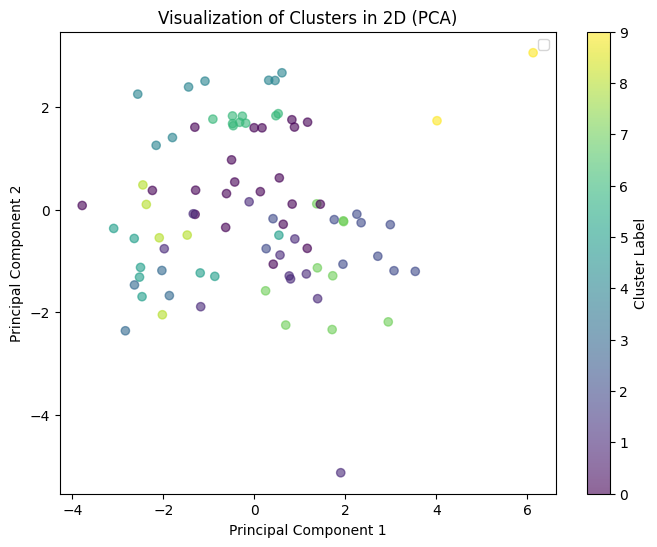

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_bow)

# Draw scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=tf_labels, cmap='viridis', alpha=0.6)
# Add title and labels
plt.title('Visualization of Clusters in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(scatter, label='Cluster Label')
plt.show()

### We can see that overall, TF-IDF is better than BoW with Silhouette Score

In [79]:
data.to_csv('data_tfidf.csv', index=False, encoding='utf-8', sep=',') # Make the csv file from the pre-processed data